In [1]:
import get_data as gd
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import Asset as a
import numpy as np

In [2]:
#grab data 
df_data = gd.grab_data()

# Baseline model from assignment spec example

In [36]:
#baseline algorithm which compares ema with sma
days = range(len(df_data))

def baselineFunction(ema, sma):
    assetBase = a.Asset([None])
    
    in_position = False
    ema = np.asarray(df_data[ema])
    sma = np.asarray(df_data[sma])
    ema_vs_sma = ema > sma #gets indexes when ema is larger than sma
    money_progress = [] #list to store money per day
    
    btc = np.asarray(df_data['close'])
    
    in_position = False
    for i in range(len(df_data)):
        #Buy 
        if not in_position and ema_vs_sma[i]:
            assetBase.buy(btc[i])
            in_position = True
        #Sell
        elif in_position and not ema_vs_sma[i]:
            assetBase.sell(btc[i])
            in_position = False
        
        money_progress.append(assetBase.coin * btc[i] + assetBase.money)
    #Final sell at the end of period
    if in_position:
        assetBase.sell(btc[-1])
        
    return money_progress


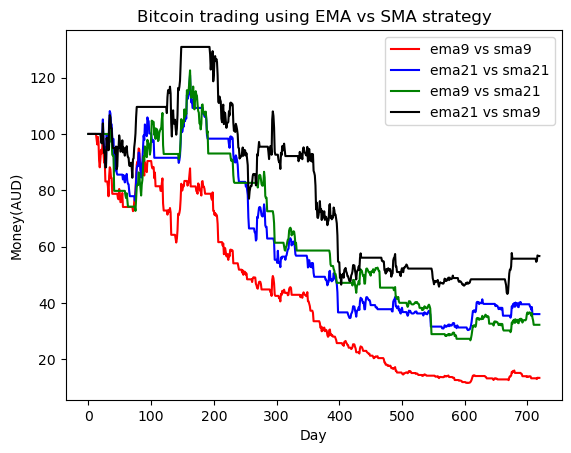

In [44]:
import matplotlib.pyplot as plt

ema21_sma21 = baselineFunction('ema_21','sma_21')
ema9_sma9 = baselineFunction('ema_9', 'sma_9')
ema21_sma9 = baselineFunction('ema_21', 'sma_9')
ema9_sma21 = baselineFunction ('ema_9', 'sma_21')

plt.plot(days,ema9_sma9,color='r',label='ema9 vs sma9')
plt.plot(days,ema21_sma21,color='b',label='ema21 vs sma21')
plt.plot(days,ema9_sma21,color='g',label='ema9 vs sma21')
plt.plot(days,ema21_sma9,color='k',label='ema21 vs sma9')

plt.legend()
plt.title('Bitcoin trading using EMA vs SMA strategy')
plt.xlabel('Day')
plt.ylabel('Money(AUD)')
plt.show()